# 多项式回归
## 步骤
1. 多项式的特征 Polynomial Feature
2. 数据的归一化 (多项式特征后, 特征呈指数增长, 需要归一化)
3. 线性回归

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = np.random.uniform(-3, 3, size=100)
X = x.reshape(-1, 1)

In [3]:
y = 0.5 * x**2 + x + 2 + np.random.normal(0, 1, size=100)

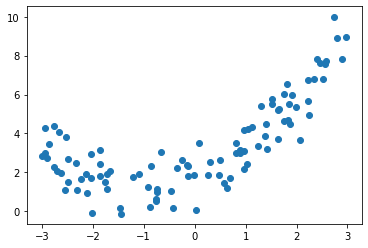

In [4]:
plt.scatter(x, y)
plt.show()

## 试试线性回归

In [5]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [6]:
y_predict = lin_reg.predict(X)

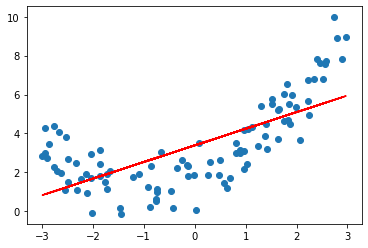

In [7]:
plt.scatter(x, y)
plt.plot(x, y_predict, color="r")
plt.show()

## 解决方法, 添加一个特征

In [8]:
(X**2).shape

(100, 1)

In [9]:
X2 = np.hstack([X, X**2]) # 升维
X2.shape

(100, 2)

In [11]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

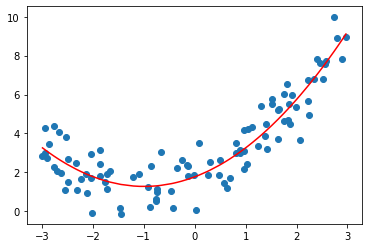

In [24]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color="r") # !!
plt.show()

In [25]:
lin_reg2.coef_

array([0.99195625, 0.49903011])

In [26]:
lin_reg2.intercept_

1.7665876476771754

# sklearn中的多项式回归

In [28]:
from sklearn.preprocessing import PolynomialFeatures # 在数据预处理的包中

In [29]:
poly = PolynomialFeatures(degree=2)
poly.fit(X)
X2 = poly.transform(X)

In [30]:
X2.shape

(100, 3)

In [31]:
X2[:5,:] # 0次方, 1次方, 2次方

array([[ 1.        , -0.12329534,  0.01520174],
       [ 1.        ,  0.97180926,  0.94441324],
       [ 1.        ,  1.99613274,  3.98454591],
       [ 1.        ,  0.63010624,  0.39703388],
       [ 1.        ,  0.57789339,  0.33396077]])

In [39]:
from sklearn.linear_model import LinearRegression

lin_reg2 = LinearRegression()
lin_reg2.fit(X2, y)
y_predict2 = lin_reg2.predict(X2)

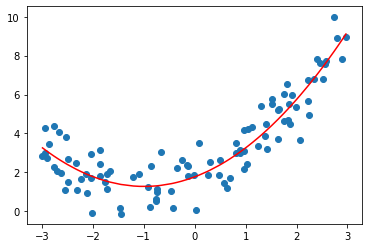

In [40]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict2[np.argsort(x)], color="r")
plt.show()

# Pipeline

In [56]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
def PolynomialRegression(degree):
    return Pipeline([
        ("poly", PolynomialFeatures(degree=degree)), # 第一个为名字
        ("std_scaler", StandardScaler()), 
        ("lin_reg", LinearRegression())
    ])

In [59]:
poly_reg = PolynomialRegression(degree=2)
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

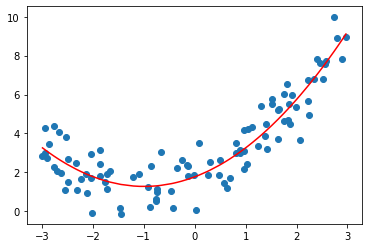

In [60]:
plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color="r")
plt.show()

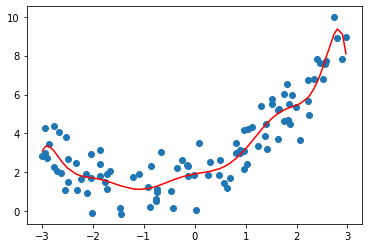

In [63]:
poly_reg = PolynomialRegression(degree=10)
poly_reg.fit(X, y)
y_predict = poly_reg.predict(X)

plt.scatter(x, y)
plt.plot(np.sort(x), y_predict[np.argsort(x)], color="r")
plt.show()